<a href="https://colab.research.google.com/github/spacemaninSeoul/fast_campus_ML300/blob/main/Chapter_1_%E1%84%8C%E1%85%A1%E1%84%83%E1%85%A9%E1%86%BC%E1%84%8B%E1%85%B3%E1%84%85%E1%85%A9_%E1%84%86%E1%85%A9%E1%84%8B%E1%85%B3%E1%86%AB_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%82%E1%85%B3%E1%86%AB_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8%E1%84%92%E1%85%A1%E1%84%80%E1%85%B5_%E1%84%8B%E1%85%A5%E1%84%85%E1%85%A7%E1%86%B8%E1%84%83%E1%85%A1%E1%84%86%E1%85%A7%E1%86%AB%E1%84%89%E1%85%A5%3F_%E1%84%8C%E1%85%A1%E1%84%83%E1%85%A9%E1%86%BC%E1%84%8B%E1%85%B3%E1%84%85%E1%85%A9_%E1%84%86%E1%85%A9%E1%84%8B%E1%85%B3%E1%86%AB_%E1%84%8C%E1%85%AE%E1%86%BC%E1%84%80%E1%85%A9_%E1%84%8C%E1%85%A1%E1%84%83%E1%85%A9%E1%86%BC%E1%84%8E%E1%85%A1_%E1%84%83%E1%85%A6%E1%84%8B%E1%85%B5%E1%84%90%E1%85%A5%E1%84%85%E1%85%B3%E1%86%AF_%E1%84%87%E1%85%AE%E1%86%AB%E1%84%89%E1%85%A5%E1%86%A8%E1%84%92%E1%85%A2%E1%84%87%E1%85%A9%E1%84%8C%E1%85%A1!(%EC%97%B0%EC%8A%B5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 자동으로 모은 데이터는 분석하기 어렵다면서? 자동으로 모은 중고 자동차 데이터를 분석해보자!
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    
    
- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - XGBoost, LightGBM 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

- 출제자 : 신제용 강사
---

## Step 0. 데이터 스크래핑이 대하여

### 스크래핑을 이용한 자동 데이터 습득

### 스크래핑된 데이터에서 아웃라이어의 특징

 - 비어있는 데이터가 많고
 - 형식이 틀린 경우가 많다.
  - (문자열 앞 뒤에 공백이 있거나, html 태그가 붙어서 들어오는 경우, 인코딩에 의해 깨진 문자를 가진 경우, 최댓값이나 최솟값으로 잘못 기입된 경우, 숫자 대신 문자열이 들어간 경우)


## Step 1. 데이터셋 준비하기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [2]:
import os

In [3]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기

os.environ ['KAGGLE_USERNAME'] = 'pseudoexaminee'
os.environ ['KAGGLE_KEY']= '50ef5cd85c486772c23beb302ab99e32'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [4]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기

!rm *.*
!kaggle datasets download -d austinreese/craigslist-carstrucks-data
!unzip '*.zip'


 95% 250M/262M [00:01<00:00, 144MB/s]
100% 262M/262M [00:02<00:00, 137MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [5]:
df = pd.read_csv('/content/vehicles.csv')

In [6]:
# EDA 및 기초 통계 분석
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [7]:
df.info

<bound method DataFrame.info of                 id  ...              posting_date
0       7222695916  ...                       NaN
1       7218891961  ...                       NaN
2       7221797935  ...                       NaN
3       7222270760  ...                       NaN
4       7210384030  ...                       NaN
...            ...  ...                       ...
426875  7301591192  ...  2021-04-04T03:21:31-0600
426876  7301591187  ...  2021-04-04T03:21:29-0600
426877  7301591147  ...  2021-04-04T03:21:17-0600
426878  7301591140  ...  2021-04-04T03:21:11-0600
426879  7301591129  ...  2021-04-04T03:21:07-0600

[426880 rows x 26 columns]>

In [8]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [9]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [10]:
df.drop(['id', 'url','region_url','VIN',
         'image_url', 'description', 'state', 'lat', 
         'long', 'posting_date'], axis=1, inplace=True)

In [11]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)

In [12]:
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,county,age
0,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,wyoming,23590,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,NaN,sedan,NaN,NaN,2.0
426876,wyoming,30590,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,NaN,sedan,red,NaN,1.0
426877,wyoming,34990,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,NaN,hatchback,white,NaN,1.0
426878,wyoming,28990,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,NaN,sedan,silver,NaN,3.0


In [13]:
# 범주형 데이터의 통계 분석하기
df['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [14]:
len(df['manufacturer'].value_counts())

42

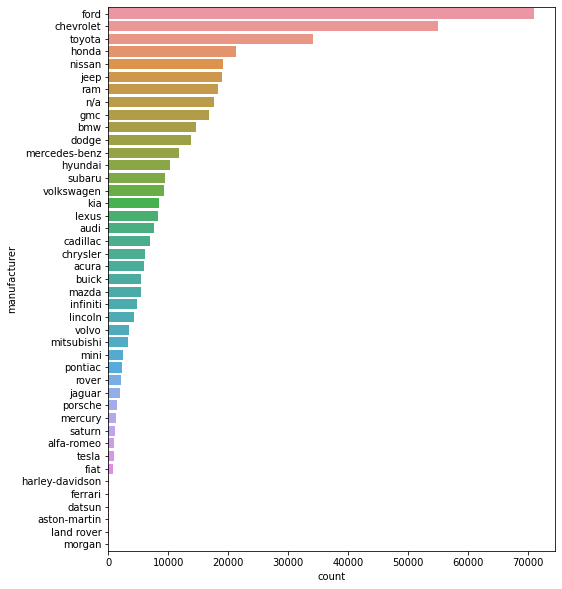

In [15]:
fig = plt.figure(figsize=(8, 10))
sns.countplot(y = 'manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [16]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'county', 'age'],
      dtype='object')

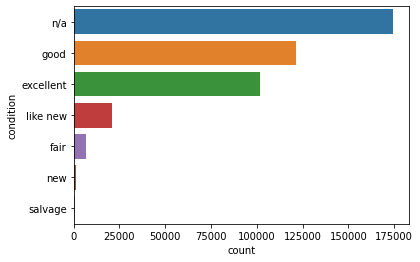

In [17]:
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

In [18]:
# 범주형 데이터 크릴닝하기
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'county', 'age'],
      dtype='object')

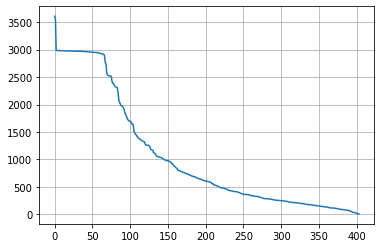

In [19]:
counts = df['region'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [20]:
n_categorical = 5
others = counts.index[n_categorical:]
df['region'] = df['region'].apply(lambda s: s if str(s) not in others else 'others')

In [21]:
df['region'].value_counts()

others                     410754
columbus                     3608
jacksonville                 3562
spokane / coeur d'alene      2988
eugene                       2985
fresno / madera              2983
Name: region, dtype: int64

(0.0, 30.0)

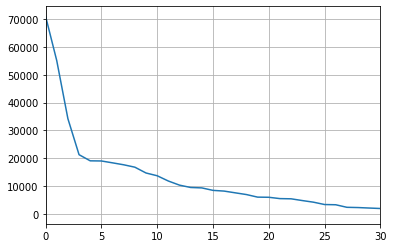

In [28]:
counts = df['manufacturer'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)
plt.xlim(0,30)

In [29]:
n_categorical = 15
others = counts.index[n_categorical:]
df['manufacturer'] = df['manufacturer'].apply(lambda s: s if str(s) not in others else 'others')

In [30]:
df['manufacturer'].value_counts()

others           85105
ford             70985
chevrolet        55064
toyota           34202
honda            21269
nissan           19067
jeep             19014
ram              18342
gmc              16785
bmw              14699
dodge            13707
mercedes-benz    11817
hyundai          10338
subaru            9495
volkswagen        9345
Name: manufacturer, dtype: int64

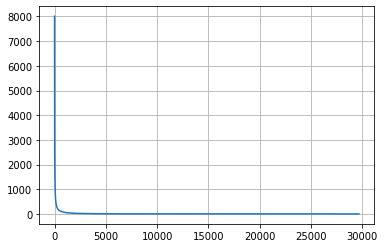

In [31]:
counts = df['model'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)


In [32]:
n_categorical = 15
others = counts.index[n_categorical:]
df['model'] = df['model'].apply(lambda s: s if str(s) not in others else 'others')

In [33]:
df['model'].value_counts()

others            373687
f-150               8009
silverado 1500      5140
1500                4211
camry               3135
silverado           3023
accord              2969
wrangler            2848
civic               2799
altima              2779
escape              2746
2500                2687
tacoma              2582
explorer            2499
grand cherokee      2489
Name: model, dtype: int64

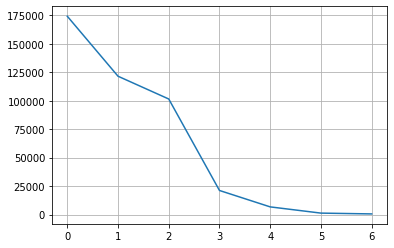

In [34]:
counts = df['condition'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)
#plt.xlim(0,5)

In [35]:
n_categorical = 4
others = counts.index[n_categorical:]
df['condition'] = df['condition'].apply(lambda s: s if str(s) not in others else 'others')

In [36]:
df['condition'].value_counts()

good         121456
excellent    101467
like new      21178
others         8675
Name: condition, dtype: int64

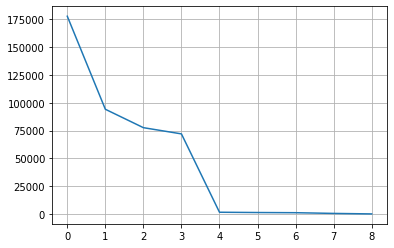

In [37]:
counts = df['cylinders'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [38]:
n_categorical = 5
others = counts.index[n_categorical:]
df['cylinders'] = df['cylinders'].apply(lambda s: s if str(s) not in others else 'others')

In [39]:
df['cylinders'].value_counts()

6 cylinders    94169
4 cylinders    77642
8 cylinders    72062
others          3617
5 cylinders     1712
Name: cylinders, dtype: int64

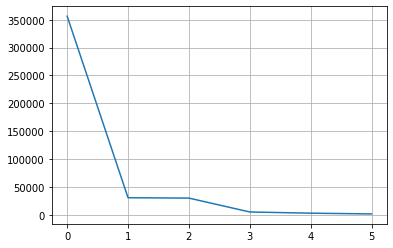

In [40]:
counts = df['fuel'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [41]:
n_categorical = 3
others = counts.index[n_categorical:]
df['fuel'] = df['fuel'].apply(lambda s: s if str(s) not in others else 'others')

In [42]:
df['fuel'].value_counts()

gas       356209
other      30728
diesel     30062
others      6868
Name: fuel, dtype: int64

In [43]:
df.drop('title_status', axis=1, inplace=True)

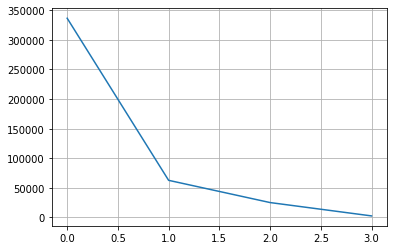

In [44]:
counts = df['transmission'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [45]:
n_categorical = 3
others = counts.index[n_categorical:]
df['transmission'] = df['transmission'].apply(lambda s: s if str(s) not in others else 'others')

In [46]:
df['transmission'].value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

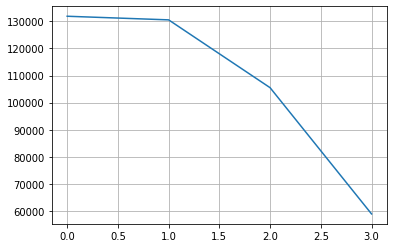

In [47]:
counts = df['drive'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [48]:
n_categorical = 3
others = counts.index[n_categorical:]
df['drive'] = df['drive'].apply(lambda s: s if str(s) not in others else 'others')

In [49]:
df['drive'].value_counts()

4wd       131904
fwd       105517
others     58892
Name: drive, dtype: int64

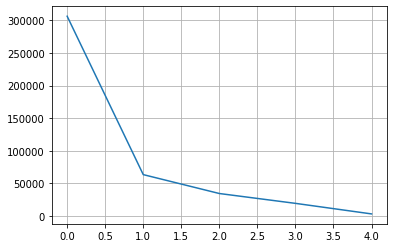

In [50]:
counts = df['size'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [51]:
n_categorical = 3
others = counts.index[n_categorical:]
df['size'] = df['size'].apply(lambda s: s if str(s) not in others else 'others')

In [52]:
df['size'].value_counts()

full-size    63465
mid-size     34476
others       22578
Name: size, dtype: int64

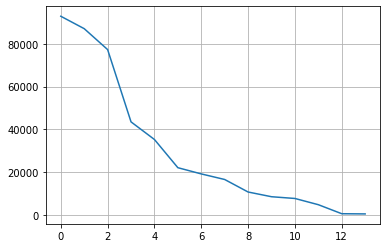

In [53]:
counts = df['type'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [54]:
n_categorical = 5
others = counts.index[n_categorical:]
df['type'] = df['type'].apply(lambda s: s if str(s) not in others else 'others')

In [55]:
df['type'].value_counts()

others    90893
sedan     87056
SUV       77284
pickup    43510
truck     35279
Name: type, dtype: int64

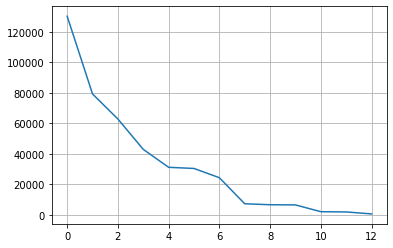

In [56]:
counts = df['paint_color'].fillna('others').value_counts()
plt.grid()
plt.plot(range(len(counts)), counts)

In [57]:
n_categorical = 8
others = counts.index[n_categorical:]
df['paint_color'] = df['paint_color'].apply(lambda s: s if str(s) not in others else 'others')

In [58]:
df['paint_color'].value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
others    18106
green      7343
Name: paint_color, dtype: int64

In [59]:
# 수치형 데이터 클리닝
# quantile() 메소드를 이용해 outlier를 제거하고 시각화하여 확인
df.describe()

,price,odometer,county,age
count,4.268800e+05,4.224800e+05,0.0,425675.000000
mean,7.519903e+04,9.804333e+04,NaN,9.764809
std,1.218228e+07,2.138815e+05,NaN,9.452120
min,0.000000e+00,0.000000e+00,NaN,-1.000000
25%,5.900000e+03,3.770400e+04,NaN,4.000000
50%,1.395000e+04,8.554800e+04,NaN,8.000000
75%,2.648575e+04,1.335425e+05,NaN,13.000000
max,3.736929e+09,1.000000e+07,NaN,121.000000


In [60]:
df.drop('county', axis=1, inplace=True)

In [61]:
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.1)
print(p1, p2)

66995.0 500.0


In [62]:
df = df[(p1 > df['price']) & (df['price'] > p2)]

In [63]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

280000.0 15812.0


In [64]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

In [65]:
df.describe()

,price,odometer,age
count,335851.000000,335851.000000,335248.000000
mean,17534.838914,101335.798690,10.239056
std,12645.528274,56884.388094,8.469817
min,501.000000,15813.000000,-1.000000
25%,7425.500000,53000.000000,5.000000
50%,14500.000000,96936.000000,8.000000
75%,25226.500000,140337.000000,13.000000
max,66992.000000,279974.000000,121.000000


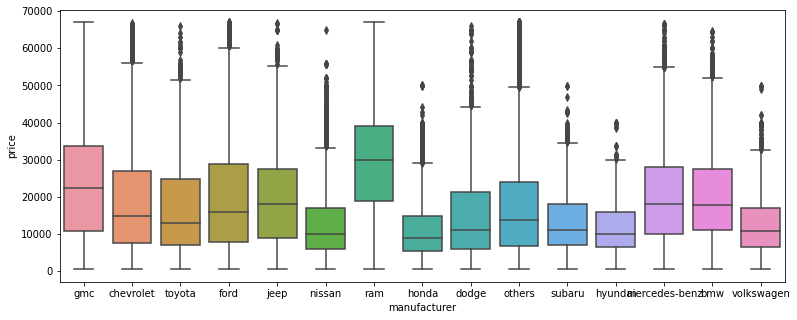

In [70]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(13,5))
sns.boxplot(x='manufacturer', y='price',data=df)

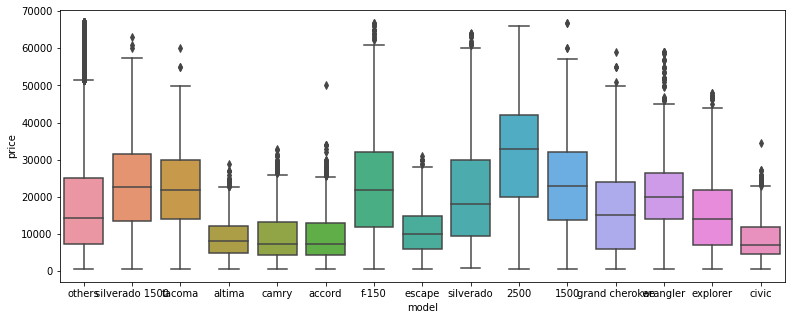

In [71]:
fig = plt.figure(figsize=(13,5))
sns.boxplot(x='model', y='price',data=df)

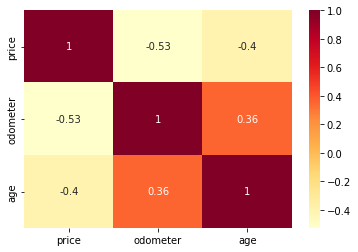

In [73]:
# 컬럼간 상관관계 히트맵으로 시각화하기
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')

In [75]:
# 모델 학습을 위한 데이터 전처리
# StandardScaler를 이용해 수치형 데이터 표준화하기
from sklearn.preprocessing import StandardScaler

In [76]:
# StandarrScaler로 수치형 데이터 표준화하기
X_num  = df[['odometer', 'age']]

scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

In [77]:
# get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = df.drop(['price', 'odometer', 'age'], axis=1)
X_cat = pd.get_dummies(X_cat)

In [78]:
# 입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat], axis=1)
y = df['price']

In [79]:
X.shape

(335851, 73)

In [82]:
X.fillna(X['age'].mean())

,odometer,age,region_columbus,region_eugene,region_fresno / madera,region_jacksonville,region_others,region_spokane / coeur d'alene,manufacturer_bmw,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_gmc,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_mercedes-benz,manufacturer_nissan,manufacturer_others,manufacturer_ram,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen,model_1500,model_2500,model_accord,model_altima,model_camry,model_civic,model_escape,model_explorer,model_f-150,model_grand cherokee,model_others,model_silverado,model_silverado 1500,model_tacoma,model_wrangler,condition_excellent,condition_good,condition_like new,condition_others,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_others,fuel_diesel,fuel_gas,fuel_other,fuel_others,transmission_automatic,transmission_manual,transmission_other,drive_4wd,drive_fwd,drive_others,size_full-size,size_mid-size,size_others,type_SUV,type_others,type_pickup,type_sedan,type_truck,paint_color_black,paint_color_blue,paint_color_green,paint_color_grey,paint_color_others,paint_color_red,paint_color_silver,paint_color_white
27,-0.763177,-0.382424,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
28,-0.529264,0.089842,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
29,-1.444613,-1.090823,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
30,-1.058496,-0.736623,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
31,0.468744,-0.264357,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426872,-1.446388,-1.090823,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
426874,-1.239741,-0.854690,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
426875,-1.214919,-0.972756,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
426878,-1.252082,-0.854690,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
